In [2]:
import numpy as np
import math
import random
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

### Create a boolean matrix in TF of size 138*7. Set all values to 0 and replace 1000 values randomly with 1.

In [4]:
a = np.zeros((138*87), dtype=bool)
a[np.random.choice(138*87, 1000, replace=False)] = 1 
a = a.reshape(138, 87)

In [5]:
b = tf.zeros((138*87), dtype=bool)

In [6]:
a

array([[False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [7]:
b

<tf.Tensor: shape=(12006,), dtype=bool, numpy=array([False, False, False, ..., False, False, False])>

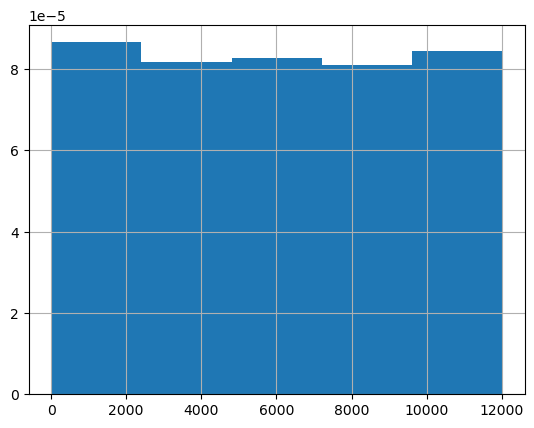

In [8]:
N = np.random.choice(138*87, 5000)
plt.hist(N, density=True, bins=5)
plt.grid()

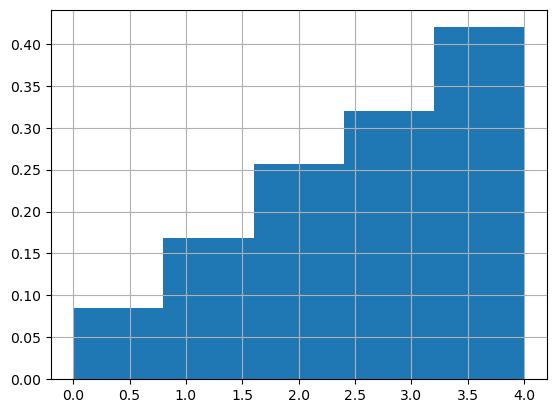

In [9]:
T = tf.random.categorical(tf.math.log([[i/sum(range(1,6)) for i in range(1,6)]]), 5000)
plt.hist(T, density=True, bins=5)
plt.grid()

### Create a linear layer class in Keras

In [10]:
class Linear(keras.layers.Layer):
    
    def __init__(self, units=32, input_dim=32):
        super().__init__()
        self.w = self.add_weight(shape=(input_dim, units), initializer='random_normal', trainable=True)
        self.b = self.add_weight(shape=(units, ), initializer='zeros', trainable=True)
        
    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

In [11]:
tf.ones((2,2))

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

In [12]:
linear_layer = Linear(4,2)

In [13]:
linear_layer(tf.ones((2,2)))

<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
array([[ 0.04210081,  0.06953517, -0.04314867, -0.12978028],
       [ 0.04210081,  0.06953517, -0.04314867, -0.12978028]],
      dtype=float32)>

### Use build method to avoid having to specify input_dim

In [14]:
class Linear(keras.layers.Layer):
    
    def __init__(self, units=32):
        super().__init__()
        self.units = units
        
    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units), initializer='random_normal', trainable=True)
        self.b = self.add_weight(shape=(self.units, ), initializer='zeros', trainable=True)
        
    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

In [15]:
class MLP(keras.layers.Layer):
    
    def __init__(self):
        super().__init__()
        self.linear_1 = Linear(32)
        self.linear_2 = Linear(32)
        self.linear_3 = Linear(10)
        
    def call(self, inputs):
        x = self.linear_1(inputs)
        x = tf.nn.relu(x)
        x = self.linear_2(x)
        x = tf.nn.relu(x)
        return self.linear_3(x)

In [16]:
#get maximum column value of each row

In [17]:
mlp = MLP()

In [18]:
y = mlp(tf.ones((2,2)))

In [19]:
y

<tf.Tensor: shape=(2, 10), dtype=float32, numpy=
array([[ 0.00753149,  0.00169714, -0.00344553,  0.00595306,  0.00068329,
         0.00117359, -0.00228132, -0.00016217,  0.00398274,  0.00020249],
       [ 0.00753149,  0.00169714, -0.00344553,  0.00595306,  0.00068329,
         0.00117359, -0.00228132, -0.00016217,  0.00398274,  0.00020249]],
      dtype=float32)>

In [20]:
class ActivityRegularization(keras.layers.Layer):
    
    def __init__(self, rate=1e-2):
        super().__init__()
        self.rate = rate
    
    def call(self, inputs):
        self.add_loss(self.rate * tf.reduce_sum(inputs))
        return inputs

In [21]:
tf.reduce_sum(tf.ones((14,10)))

<tf.Tensor: shape=(), dtype=float32, numpy=140.0>

In [22]:
mlp.losses

[]

In [23]:
class SparseMLP(keras.layers.Layer):
    
    def __init__(self):
        super().__init__()
        self.linear_1 = Linear(128)
        self.regularization = ActivityRegularization(1e-2)
        self.linear_3 = Linear(2)
    
    def call(self, inputs):
        x = self.linear_1(inputs)
        x = tf.nn.relu(x)
        x = self.regularization(x)
        return self.linear_3(x)

In [24]:
mlp = SparseMLP()
y = mlp(tf.ones((200, 4)))

In [25]:
mlp.losses

[<tf.Tensor: shape=(), dtype=float32, numpy=11.872949>]

In [26]:
# write training loop for sparse mlp
# get dataset

# DQN
# collect transitions and go through network update process
# get max value of state-action pairs

In [27]:
(X_train, y_train), _ = keras.datasets.mnist.load_data()

In [28]:
dataset = tf.data.Dataset.from_tensor_slices(
    (X_train.reshape(60000, 784).astype('float32') / 255, y_train)
)
dataset = dataset.shuffle(buffer_size=1024).batch(64)

In [29]:
dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 784), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.uint8, name=None))>

In [30]:
# access different elements of dataset
# get dataset of Transitions

In [31]:
linear_layer = Linear(10)

In [32]:
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = keras.optimizers.SGD(learning_rate=1e-3)

In [33]:
for step, (x, y) in enumerate(dataset):
    with tf.GradientTape() as tape:
        logits = linear_layer(x)
        loss = loss_fn(y, logits)

In [34]:
for step, (x, y) in enumerate(dataset):
    print(step, x, y)

0 tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(64, 784), dtype=float32) tf.Tensor(
[6 2 1 6 7 8 9 5 0 0 7 8 9 7 5 6 5 0 4 3 2 7 8 7 5 4 7 4 6 5 8 3 5 2 4 9 4
 0 1 1 8 2 1 1 1 6 2 8 2 4 8 4 3 9 3 9 3 1 2 7 1 1 8 4], shape=(64,), dtype=uint8)
1 tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(64, 784), dtype=float32) tf.Tensor(
[3 2 2 6 2 2 0 1 5 5 9 9 9 1 9 0 0 0 0 9 1 8 4 0 8 6 7 2 4 3 2 3 0 9 1 8 6
 1 0 6 3 0 1 1 4 6 8 2 4 0 0 7 2 8 2 6 1 3 2 6 5 8 3 3], shape=(64,), dtype=uint8)
2 tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(64, 784), dtype=float32) tf.Tensor(
[8 8 3 0 7 2 9 7 7 7 1 7 7 6 1 5 1 4 6 1 4 2 

690 tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(64, 784), dtype=float32) tf.Tensor(
[4 1 7 6 0 7 5 9 5 1 3 0 6 4 0 9 9 9 3 6 5 4 1 9 5 7 7 1 7 9 3 2 1 9 9 3 6
 4 2 4 6 9 0 3 7 0 1 9 6 6 9 4 8 2 9 5 8 3 2 6 4 9 0 1], shape=(64,), dtype=uint8)
691 tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(64, 784), dtype=float32) tf.Tensor(
[2 5 0 9 7 1 7 6 4 0 4 7 5 7 5 1 9 6 5 7 1 1 5 4 0 8 6 8 9 0 4 8 7 7 1 3 7
 5 7 0 9 6 0 5 3 8 4 5 8 6 6 2 1 3 7 5 7 9 6 4 2 2 5 3], shape=(64,), dtype=uint8)
692 tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(64, 784), dtype=float32) tf.Tensor(
[9 2 2 2 6 3 9 8 9 5 4 7 4 2 9 1 8 8 0 

In [35]:
# how can you use this to create a Q-function? 

In [36]:
gradients = tape.gradient(loss, linear_layer.trainable_weights)

In [37]:
gradients

[<tf.Tensor: shape=(784, 10), dtype=float32, numpy=
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 0.02907065,  0.00125923, -0.04247911, -0.02492099, -0.10271752,
         0.0454324 , -0.01415861,  0.12238765, -0.01103651, -0.0028372 ],
       dtype=float32)>]

In [38]:
optimizer.apply_gradients(zip(gradients, linear_layer.trainable_weights))

<tf.Variable 'UnreadVariable' shape=() dtype=int64, numpy=1>

In [39]:
tf.ones((5,12))

<tf.Tensor: shape=(5, 12), dtype=float32, numpy=
array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]], dtype=float32)>

In [40]:
tf.random.normal((5, 12))

<tf.Tensor: shape=(5, 12), dtype=float32, numpy=
array([[ 0.89864635, -0.99631286, -0.07080447,  0.7997988 ,  1.0195936 ,
        -1.9738487 , -0.23739834, -0.09064867,  0.3919021 , -0.08814304,
        -0.2549096 ,  1.2420422 ],
       [ 0.2564322 , -0.98947793,  0.12607595, -1.0843652 ,  2.0961056 ,
        -0.5976976 ,  1.2999934 ,  0.8925446 ,  0.87267995, -0.6929591 ,
        -0.01415719,  0.00696408],
       [ 0.09167503,  0.69671863, -0.23407254,  0.27515167,  1.5686082 ,
         0.5680678 ,  0.3711676 ,  0.21818137,  2.0245512 , -0.51533276,
         1.4997796 ,  0.25634545],
       [-0.45402002,  0.1813314 ,  0.03580317, -0.56967384,  1.1262201 ,
        -0.15086678, -1.1323776 ,  1.6616796 , -2.054361  , -2.264316  ,
         1.5024897 , -1.2047555 ],
       [ 1.6975962 ,  1.5911463 , -0.403167  ,  1.4514338 , -0.15881027,
        -0.36467126, -2.7039623 , -0.58354586,  0.69722545,  0.69399196,
        -1.2924986 , -0.69263476]], dtype=float32)>

In [41]:
# get array/tensor as input to model
tf.random.normal((303,5))

<tf.Tensor: shape=(303, 5), dtype=float32, numpy=
array([[ 1.228629  ,  0.08686603, -1.2911639 ,  1.1015508 , -0.91181815],
       [ 0.43058428, -0.29033822, -2.9760041 , -0.19025202, -2.7722864 ],
       [-0.53212523, -0.00639575, -1.7440476 ,  0.570665  , -0.87419385],
       ...,
       [-0.08901764,  0.5987263 ,  1.2269721 , -0.97535056,  1.4621282 ],
       [-0.39476812,  0.8668492 ,  0.44071496, -0.33588478,  2.7811906 ],
       [-0.30827093,  1.3314818 , -0.45162514,  1.1769392 ,  0.95849687]],
      dtype=float32)>

In [42]:
def get_basic_model():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

    model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])
    return model

In [43]:
model = get_basic_model()

In [44]:
model.fit(tf.random.normal((303,5)), tf.random.normal((303,)), epochs=15, batch_size=128)

Epoch 1/15
3/3 [==============================] - 0s 2ms/step - loss: 0.8696 - accuracy: 0.0000e+00
Epoch 2/15
3/3 [==============================] - 0s 1ms/step - loss: 0.8508 - accuracy: 0.0000e+00
Epoch 3/15
3/3 [==============================] - 0s 2ms/step - loss: 0.8327 - accuracy: 0.0000e+00
Epoch 4/15
3/3 [==============================] - 0s 997us/step - loss: 0.8153 - accuracy: 0.0000e+00
Epoch 5/15
3/3 [==============================] - 0s 1ms/step - loss: 0.7979 - accuracy: 0.0000e+00
Epoch 6/15
3/3 [==============================] - 0s 2ms/step - loss: 0.7810 - accuracy: 0.0000e+00
Epoch 7/15
3/3 [==============================] - 0s 1ms/step - loss: 0.7651 - accuracy: 0.0000e+00
Epoch 8/15
3/3 [==============================] - 0s 2ms/step - loss: 0.7494 - accuracy: 0.0000e+00
Epoch 9/15
3/3 [==============================] - 0s 1ms/step - loss: 0.7339 - accuracy: 0.0000e+00
Epoch 10/15
3/3 [==============================] - 0s 2ms/step - loss: 0.7183 - accuracy: 0.0000e+

In [45]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

X = np.random.random((5000,22))
y = np.random.random((5000,1))
 
X_train,X_test, y_train,y_test = train_test_split(X,y)
 
dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_data = dataset.shuffle(len(X_train)).batch(32)
train_data = train_data.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
 
valid_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test))
valid_data = valid_ds.batch(32) 

def create_model():
    tfkl = tf.keras.layers
    inp = tf.keras.Input(shape=(22,))
    x = tfkl.Dense(128, activation="linear")(inp)
    x = tfkl.Dense(64, activation="linear")(x)
    x = tfkl.Dense(1, activation="linear")(x)
    
    model = tf.keras.models.Model(inp, x)
    model.compile(loss="mae", optimizer="adam", metrics=["mae"])
    return model

model=create_model()
model.summary()

model.fit(train_data, epochs=3, validation_data=valid_data) 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 22)]              0         
                                                                 
 dense_3 (Dense)             (None, 128)               2944      
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,265
Trainable params: 11,265
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
118/118 [==============================] - 0s 1ms/step - loss: 0.2763 - mae: 0.2763 - val_loss: 0.2770 - val_mae: 0.2770
Epoch 2/3
118/118 [==============================] - 0s 79

In [56]:
def get_basic_model():
    model = tf.keras.Sequential([
    tf.keras.Input(shape=(22,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

    model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])
    return model

model = get_basic_model()
model.fit(tf.random.normal((300,22)), tf.random.normal((300,)), epochs=15, batch_size=128)

Epoch 1/15
3/3 [==============================] - 0s 1ms/step - loss: 0.9215 - accuracy: 0.0000e+00
Epoch 2/15
3/3 [==============================] - 0s 1ms/step - loss: 0.8905 - accuracy: 0.0000e+00
Epoch 3/15
3/3 [==============================] - 0s 1ms/step - loss: 0.8612 - accuracy: 0.0000e+00
Epoch 4/15
3/3 [==============================] - 0s 1ms/step - loss: 0.8344 - accuracy: 0.0000e+00
Epoch 5/15
3/3 [==============================] - 0s 1ms/step - loss: 0.8067 - accuracy: 0.0000e+00
Epoch 6/15
3/3 [==============================] - 0s 1ms/step - loss: 0.7820 - accuracy: 0.0000e+00
Epoch 7/15
3/3 [==============================] - 0s 997us/step - loss: 0.7586 - accuracy: 0.0000e+00
Epoch 8/15
3/3 [==============================] - 0s 997us/step - loss: 0.7346 - accuracy: 0.0000e+00
Epoch 9/15
3/3 [==============================] - 0s 996us/step - loss: 0.7125 - accuracy: 0.0000e+00
Epoch 10/15
3/3 [==============================] - 0s 997us/step - loss: 0.6907 - accuracy: 0.

In [53]:
# Approximate the sine function using Keras layers or models. 

def get_sin_model():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4)
  ])

    model.compile(optimizer='adam',
                loss=tf.keras.losses.MeanSquaredError(),
                metrics=['accuracy'])
    return model

x = tf.linspace(-math.pi, math.pi, 2000)
y = tf.sin(x)

model = get_sin_model()
model.fit(x, y)

ValueError: in user code:

    File "C:\Users\Nazia.Habib\Anaconda3\envs\dsa\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Nazia.Habib\Anaconda3\envs\dsa\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Nazia.Habib\Anaconda3\envs\dsa\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Nazia.Habib\Anaconda3\envs\dsa\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\Nazia.Habib\Anaconda3\envs\dsa\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Nazia.Habib\Anaconda3\envs\dsa\lib\site-packages\keras\engine\input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_3' (type Sequential).
    
    Input 0 of layer "dense_12" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer 'sequential_3' (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=float32)
      • training=True
      • mask=None


In [59]:
tf.linspace(-math.pi, math.pi, 2000)

<tf.Tensor: shape=(2000,), dtype=float32, numpy=
array([-3.1415927, -3.1384497, -3.1353064, ...,  3.1353066,  3.1384494,
        3.1415927], dtype=float32)>

In [52]:
tf.sin(x)

<tf.Tensor: shape=(2000,), dtype=float32, numpy=
array([ 8.7422777e-08, -3.1429797e-03, -6.2862537e-03, ...,
        6.2860153e-03,  3.1432181e-03, -8.7422777e-08], dtype=float32)>

In [50]:
tf.random.normal((300,22))

<tf.Tensor: shape=(300, 22), dtype=float32, numpy=
array([[ 0.14376871, -0.989535  , -0.71306473, ...,  1.3238248 ,
        -0.3094533 ,  0.46378416],
       [ 0.12656513, -0.8474944 ,  0.2783237 , ..., -0.2913338 ,
        -0.5451526 , -0.9614087 ],
       [-0.02422805,  0.785812  ,  0.5958755 , ..., -1.2693515 ,
         1.013412  ,  2.1959965 ],
       ...,
       [-1.1513543 , -0.08691391,  0.4820363 , ...,  0.21034622,
         0.34208444, -0.7011904 ],
       [-0.5700329 , -1.1174501 ,  1.6279119 , ..., -0.9803314 ,
        -0.6071359 ,  0.4307017 ],
       [ 0.00322794,  0.3477618 , -1.5995601 , ..., -0.9069581 ,
        -1.4001008 , -0.68367714]], dtype=float32)>

In [6]:
np.identity(4)[3:9]

array([[0., 0., 0., 1.]])